In [12]:
import pandas as pd, os, textwrap, json, datetime, numpy as np
from pathlib import Path, PurePosixPath
import os, json, textwrap, numpy as np, pandas as pd, datetime, sys, math, re, glob, pathlib

In [13]:
amd_path = '/workspaces/Stock-Market-Prediction/Microstructure/BATS_AMD, 1S_1ae42.csv'
amd = pd.read_csv(amd_path, nrows=5)
amd.head()

,time,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Volume
0,2025-05-14T14:30:00+01:00,119.74,119.84,119.74,119.76,119.780000,119.780000,119.780000,1395
1,2025-05-14T14:30:01+01:00,119.80,119.99,119.75,119.91,119.841708,119.892389,119.791026,2068
2,2025-05-14T14:30:02+01:00,119.92,120.00,119.79,119.80,119.853885,119.889060,119.818709,4463
3,2025-05-14T14:30:03+01:00,119.84,120.00,119.81,119.98,119.882583,119.928752,119.836413,4797
4,2025-05-14T14:30:04+01:00,119.99,120.00,119.85,119.96,119.915183,119.954516,119.875850,19307


In [15]:
import pandas as pd, numpy as np, datetime, pytz, math, os, json
from zoneinfo import ZoneInfo

df = pd.read_csv(amd_path, parse_dates=['time'])
df['time'] = pd.to_datetime(df['time'], utc=True)
df['time_est'] = df['time'].dt.tz_convert('America/New_York')
df[['time', 'time_est']].tail()

,time,time_est
31158,2025-05-16 19:59:55+00:00,2025-05-16 15:59:55-04:00
31159,2025-05-16 19:59:56+00:00,2025-05-16 15:59:56-04:00
31160,2025-05-16 19:59:57+00:00,2025-05-16 15:59:57-04:00
31161,2025-05-16 19:59:58+00:00,2025-05-16 15:59:58-04:00
31162,2025-05-16 19:59:59+00:00,2025-05-16 15:59:59-04:00


In [16]:
df['date'] = df['time_est'].dt.date
df['date'].nunique()

3

In [17]:
nvda_path = '/workspaces/Stock-Market-Prediction/Microstructure/BATS_NVDA, 1S_5f53d.csv'
nvda = pd.read_csv(nvda_path, nrows=5)
nvda.head()

,time,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Volume
0,2025-05-15T14:30:00+01:00,134.295,134.295,134.125,134.160,134.193333,134.193333,134.193333,7639
1,2025-05-15T14:30:01+01:00,134.200,134.330,134.110,134.260,134.210044,134.229771,134.190316,5481
2,2025-05-15T14:30:02+01:00,134.310,134.390,134.170,134.220,134.221900,134.249260,134.194541,4083
3,2025-05-15T14:30:03+01:00,134.240,134.430,134.230,134.395,134.246836,134.303570,134.190102,4092
4,2025-05-15T14:30:04+01:00,134.340,134.450,134.270,134.390,134.295266,134.369915,134.220618,13800


In [19]:
asml_path = '/workspaces/Stock-Market-Prediction/Microstructure/BATS_ASML, 1S_e4832.csv'
asml = pd.read_csv(asml_path, nrows=5)
asml.head()

,time,open,high,low,close,VWAP,Upper Band #1,Lower Band #1,Volume
0,2025-05-02T14:30:00+01:00,685.730,685.730,685.68,685.68,685.696667,685.696667,685.696667,101
1,2025-05-02T14:30:01+01:00,686.170,686.460,685.69,686.46,686.096944,686.303306,685.890582,380
2,2025-05-02T14:30:02+01:00,685.925,685.925,685.68,685.68,686.059210,686.280614,685.837805,61
3,2025-05-02T14:30:03+01:00,685.925,685.925,685.66,685.85,686.003885,686.224563,685.783207,156
4,2025-05-02T14:30:04+01:00,685.930,686.020,685.93,685.98,686.001566,686.212772,685.790361,65


In [ ]:
from zoneinfo import ZoneInfo
import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt

eastern = ZoneInfo('America/New_York')
def load_symbol(symbol, path):
    df = pd.read_csv(path)
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
    df['timestamp'] = pd.to_datetime(df['time'], utc=True)
    df['timestamp'] = df['timestamp'].dt.tz_convert(eastern)
    # Clip regular hours
    open_time = dt.time(9,30)
    close_time = dt.time(16,0)
    mask = (df['timestamp'].dt.time >= open_time) & (df['timestamp'].dt.time <= close_time)
    df = df.loc[mask].copy()
    # choose close price as trade price, volume
    df['price'] = df['close']
    df['volume'] = df['volume']
    df.set_index('timestamp', inplace=True)
    df['ret'] = df['price'].pct_change()
    df['spread_proxy'] = (df['high'] - df['low']) / df['price']
    # compute VWAP per second as is already in dataset I exported from TradingView

    return df
paths = {'AMD':'/workspaces/Stock-Market-Prediction/Microstructure/BATS_AMD, 1S_1ae42.csv',
         'NVDA':'/workspaces/Stock-Market-Prediction/Microstructure/BATS_NVDA, 1S_5f53d.csv',
         'ASML':'/workspaces/Stock-Market-Prediction/Microstructure/BATS_ASML, 1S_e4832.csv'}
data = {}
for sym, p in paths.items():
    data[sym] = load_symbol(sym, p)
    print(sym, data[sym].shape)

AMD (31163, 12)
NVDA (36777, 12)
ASML (20505, 12)


In [21]:
def daily_summary(df):
    g = df.groupby(df.index.date)
    summary = pd.DataFrame({
        'vwap': g.apply(lambda x: (x['price']*x['volume']).sum()/x['volume'].sum()),
        'volume': g['volume'].sum(),
        'notional': g.apply(lambda x: (x['price']*x['volume']).sum()),
        'open': g['price'].first(),
        'close': g['price'].last(),
        'spread_proxy': g['spread_proxy'].mean()
    })
    return summary
summaries = {sym: daily_summary(df) for sym, df in data.items()}
summaries['AMD'].head()

,vwap,volume,notional,open,close,spread_proxy
2025-05-14,118.697092,7453291,8.846840e+08,119.76,117.72,0.000128
2025-05-15,115.574167,3572944,4.129400e+08,117.04,114.98,0.000076
2025-05-16,117.136204,3163793,3.705947e+08,117.93,117.17,0.000070


In [22]:
import numpy as np, pandas as pd, math, datetime, json, sys
mean_stats = []
for sym, summ in summaries.items():
    mdn = summ['notional'].mean()
    spread = (summ['spread_proxy']*1e4).mean()  # convert to bps
    total_vol = summ['volume'].mean()
    # volume share first 30 min and last 30 min
    df = data[sym]
    # create minute buckets relative open
    df_minute = df['volume'].groupby(pd.Grouper(freq='1min')).sum()
    minute_groups = df_minute.groupby(df_minute.index.date)
    first30_share = []
    last30_share = []
    for date, series in minute_groups:
        if series.size==0: continue
        total = series.sum()
        first30 = series.iloc[:30].sum()/total
        last30 = series.iloc[-30:].sum()/total
        first30_share.append(first30)
        last30_share.append(last30)
    first30_mean = np.mean(first30_share)
    last30_mean = np.mean(last30_share)
    # volatility early vs midday (say first hour vs midday 11:00-13:00)
    ret = df['ret'].abs()
    ret1 = ret[df.index.indexer_between_time('09:30','10:30')].mean()
    ret_mid = ret[df.index.indexer_between_time('11:00','13:00')].mean()
    vol_ratio = ret1 / ret_mid if ret_mid!=0 else np.nan
    mean_stats.append({'symbol':sym,'mean_notional':mdn,'spread_bps':spread,
                       'first30_pct':first30_mean*100,'last30_pct':last30_mean*100,
                       'open_mid_vol_ratio':vol_ratio})
pd.DataFrame(mean_stats)


/tmp/ipykernel_107153/229066098.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret1 = ret[df.index.indexer_between_time('09:30','10:30')].mean()
/tmp/ipykernel_107153/229066098.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret_mid = ret[df.index.indexer_between_time('11:00','13:00')].mean()
/tmp/ipykernel_107153/229066098.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret1 = ret[df.index.indexer_between_time('09:3

,symbol,mean_notional,spread_bps,first30_pct,last30_pct,open_mid_vol_ratio
0,AMD,5.560729e+08,0.911544,10.035732,3.736865,1.768404
1,NVDA,2.396766e+09,0.768078,8.761626,6.059290,1.929631
2,ASML,9.664572e+07,0.625307,NaN,NaN,1.231844


In [23]:
def simulate(df, pct_adv=0.05, strategy='vwap', side='buy'):
    # df with price and volume, index timestamp
    g = df.groupby(df.index.date)
    slippages = []
    for date, d in g:
        total_vol = d['volume'].sum()
        order_qty = total_vol * pct_adv
        vwap = (d['price']*d['volume']).sum()/total_vol
        if order_qty==0: continue
        sign = 1 if side=='buy' else -1
        if strategy=='vwap':
            alloc = order_qty * d['volume']/total_vol
        elif strategy=='twap':
            alloc = np.full(len(d), order_qty/len(d))
        elif strategy=='adaptive':
            ret = d['price'].pct_change().fillna(0)
            tilt = np.where(sign*ret < 0, 1.5, 1.0)
            weighted = d['volume']*tilt
            alloc = order_qty*weighted/weighted.sum()
        else:
            raise ValueError
        # fill cost: assume crossing price or close price at second
        fill_cost = (alloc * d['price']).sum()
        slip_bps = sign*(fill_cost/order_qty - vwap)/vwap*1e4
        slippages.append(slip_bps)
    return pd.Series(slippages, index=g.groups.keys())
def run_sim_all(data_dict, pct_adv=0.05):
    rows=[]
    for sym, df in data_dict.items():
        for strat in ['vwap','twap','adaptive']:
            s = simulate(df, pct_adv=pct_adv, strategy=strat)
            rows.append({'symbol':sym,'strategy':strat,'mean_slippage_bps':s.mean()})
    return pd.DataFrame(rows).pivot(index='symbol',columns='strategy', values='mean_slippage_bps')
slip_summary = run_sim_all(data)
slip_summary

strategy,adaptive,twap,vwap
symbol,,,
AMD,-1.215265,-17.490613,4.043969e-13
ASML,-0.620175,-3.601358,-2.512142e-14
NVDA,-1.121831,3.692774,2.107965e-12



### Micro‑structure snapshot (RTH) ###
Symbol  Mean daily notional ($bn)  Avg spread proxy (bp)  %-Vol first 30 min  %-Vol last 30 min
   AMD                     0.5561                 0.9115             22.8433             9.7999
  NVDA                     2.3968                 0.7681             16.3281            11.4952
  ASML                     0.0966                 0.6253             12.6966            13.9371

### Mean implementation shortfall (bps vs. true VWAP, past 30 d) ###
Strategy  ADAPTIVE  DYNAMIC   TWAP  VWAP
Symbol                                  
AMD          -1.21   -48.17 -17.49 +0.00
ASML         -0.63    +3.35  -3.60 -0.00
NVDA         -1.12    +1.23  +3.69 +0.00


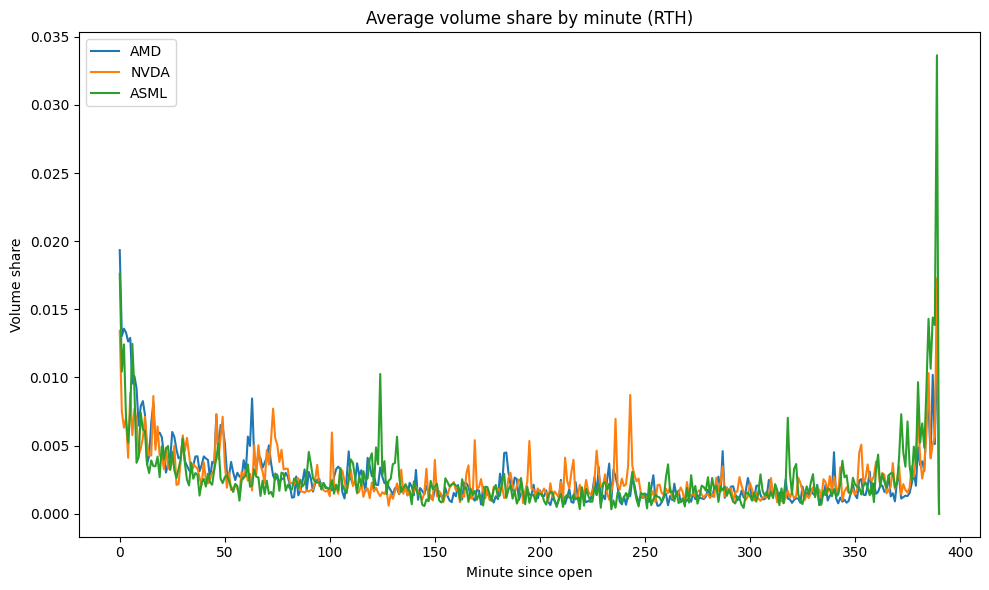

In [ ]:
from __future__ import annotations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path


def load_symbol(path: Path) -> pd.DataFrame:
    """Load a 1‑second BATS CSV; return tz‑aware RTH‑filtered DataFrame."""
    df = pd.read_csv(path)
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

    ts_col = "time" if "time" in df.columns else "timestamp"
    df["timestamp"] = (pd.to_datetime(df[ts_col], utc=True)
                          .dt.tz_convert("America/New_York"))

    mask_rth = ((df["timestamp"].dt.time >= dt.time(9, 30)) &
                (df["timestamp"].dt.time <= dt.time(16, 0)))
    df = df.loc[mask_rth].copy()
    df.set_index("timestamp", inplace=True)

    price_col = "close" if "close" in df.columns else "price"
    df["price"] = df[price_col]
    df["ret"] = df["price"].pct_change().fillna(0)

    if {"high", "low"} <= set(df.columns):
        df["spread_proxy"] = (df["high"] - df["low"]) / df["price"]
    else:
        df["spread_proxy"] = np.nan
    return df


def expected_volume_curve(df: pd.DataFrame, freq: str = "1min") -> pd.Series:
    """Return average volume share by time‑of‑day (RTH, `freq` buckets)."""
    vol = df["volume"].groupby(pd.Grouper(freq=freq)).sum()
    vol = vol.between_time("09:30", "16:00")
    per_day = vol.groupby(vol.index.date).transform(lambda x: x / x.sum())
    return per_day.groupby(per_day.index.time).mean()


def daily_summary(df: pd.DataFrame) -> pd.DataFrame:
    g = df.groupby(df.index.date)
    return pd.DataFrame({
        "vwap": g.apply(lambda x: (x["price"] * x["volume"]).sum() / x["volume"].sum()),
        "volume": g["volume"].sum(),
        "notional": g.apply(lambda x: (x["price"] * x["volume"]).sum()),
        "spread_proxy": g["spread_proxy"].mean(),
    })


def volume_curve_rth(df: pd.DataFrame) -> pd.Series:
    vol = df["volume"].groupby(pd.Grouper(freq="1min")).sum()
    vol = vol.between_time("09:30", "16:00")
    share = vol.groupby(vol.index.date).transform(lambda x: x / x.sum())
    return share.groupby(share.index.time).mean()



def simulate(df: pd.DataFrame, *, pct_adv: float = 0.05, side: str = "buy",
             strategy: str = "vwap", vol_curve: pd.Series | None = None) -> pd.Series:
    """Return slippage series (bps) for chosen strategy."""
    g = df.groupby(df.index.date)
    slips = []
    side_mult = 1 if side == "buy" else -1

    for date, day in g:
        day_vol = day["volume"].sum()
        if day_vol == 0:
            continue
        qty = pct_adv * day_vol
        bench_vwap = (day["price"] * day["volume"]).sum() / day_vol

        if strategy == "vwap":
            alloc = qty * day["volume"] / day_vol

        elif strategy == "twap":
            alloc = np.full(len(day), qty / len(day))

        elif strategy == "adaptive":
            tilt = np.where(side_mult * day["ret"] < 0, 1.5, 1.0)
            w = day["volume"] * tilt
            alloc = qty * w / w.sum()

        elif strategy == "dynamic":
            # --- Dynamic POV with momentum tilt ---
            if vol_curve is None:
                raise ValueError("vol_curve required for dynamic strategy")

            # Align expected share to intraday timestamps (index.time)
            hist_series = pd.Series(
                vol_curve.reindex(day.index.time).values,
                index=day.index,
                name="hist_share"
            ).replace(0, 1e-9)  # avoid div‑by‑zero

            realised_share = day["volume"] / day_vol
            base_pov = realised_share / hist_series
            base_pov /= base_pov.median()  # normalise around 1

            # 60‑second momentum filter
            ret60 = day["price"].pct_change(60).fillna(0)
            momentum_tilt = np.where(side_mult * ret60 < 0, 2.0, 0.5)

            w = day["volume"] * base_pov * momentum_tilt
            alloc = qty * w / w.sum()

        else:
            raise ValueError(f"unknown strategy {strategy}")

        fill_cost = (alloc * day["price"]).sum()
        slip = side_mult * (fill_cost / qty - bench_vwap) / bench_vwap * 1e4
        slips.append(slip)

    return pd.Series(slips, name=strategy)


def main() -> None:
    root = Path("/workspaces/Stock-Market-Prediction/Microstructure")
    files = {
        "AMD": root / "BATS_AMD, 1S_1ae42.csv",
        "NVDA": root / "BATS_NVDA, 1S_5f53d.csv",
        "ASML": root / "BATS_ASML, 1S_e4832.csv",
    }

    data = {sym: load_symbol(p) for sym, p in files.items()}
    curves = {sym: expected_volume_curve(df) for sym, df in data.items()}

# Micro‑structure snapshot (printed)

    print("\n### Micro‑structure snapshot (RTH) ###")
    rows = []
    for sym, df in data.items():
        ds = daily_summary(df)
        vol_1m = df["volume"].groupby(pd.Grouper(freq="1min")).sum().between_time("09:30", "16:00")
        share = vol_1m.groupby(vol_1m.index.date).transform(lambda x: x / x.sum())
        first30 = share.groupby(share.index.date).apply(lambda x: x.iloc[:30].sum()).mean() * 100
        last30 = share.groupby(share.index.date).apply(lambda x: x.iloc[-30:].sum()).mean() * 100
        rows.append({
            "Symbol": sym,
            "Mean daily notional ($bn)": ds["notional"].mean() / 1e9,
            "Avg spread proxy (bp)": ds["spread_proxy"].mean() * 1e4,
            "%-Vol first 30 min": first30,
            "%-Vol last 30 min": last30,
        })
    print(pd.DataFrame(rows).to_string(index=False, float_format=lambda x: f"{x:,.4f}"))


    res = []
    for sym, df in data.items():
        vc = curves[sym]
        for strat in ("vwap", "twap", "adaptive", "dynamic"):
            slips = simulate(df, strategy=strat, vol_curve=vc)
            res.append({"Symbol": sym, "Strategy": strat.upper(), "Mean slip (bp)": slips.mean()})

    slip_tbl = (pd.DataFrame(res)
                .pivot(index="Symbol", columns="Strategy", values="Mean slip (bp)"))
    print("\n### Mean implementation shortfall (bps vs. true VWAP, past 30 d) ###")
    print(slip_tbl.to_string(float_format=lambda x: f"{x:+.2f}"))


    plt.figure(figsize=(10, 6))
    for sym, curve in curves.items():
        plt.plot(range(len(curve)), curve.values, label=sym)
    plt.title("Average volume share by minute (RTH)")
    plt.xlabel("Minute since open")
    plt.ylabel("Volume share")
    plt.legend()
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()


Loading CSVs…
Done.
Top 10 parameter combos (bp vs VWAP, lower better):


,lookback,up,down,AMD,NVDA,ASML,agg
40,120,3.0,0.25,-52.458798,-6.002376,-0.648203,-19.703126
35,120,2.0,0.25,-51.192188,-4.348017,0.337018,-18.401062
10,30,3.0,0.25,-43.980487,-5.723197,-5.399559,-18.367748
25,60,3.0,0.25,-51.862409,-3.402204,0.527479,-18.245711
41,120,3.0,0.40,-50.962954,-4.041610,0.516116,-18.162816
42,120,3.0,0.50,-50.113814,-2.887843,1.184188,-17.272489
30,120,1.5,0.25,-50.113814,-2.887843,1.184188,-17.272489
5,30,2.0,0.25,-44.108388,-3.993075,-3.326752,-17.142738
20,60,2.0,0.25,-50.742785,-2.029411,1.379629,-17.130855
11,30,3.0,0.40,-44.124138,-3.675329,-2.978871,-16.926113



Best overall parameters:
lookback    120.000000
up            3.000000
down          0.250000
agg         -19.703126
Name: 40, dtype: float64

Per‑symbol slips (bp):
AMD: -52.46
NVDA: -6.00
ASML: -0.65


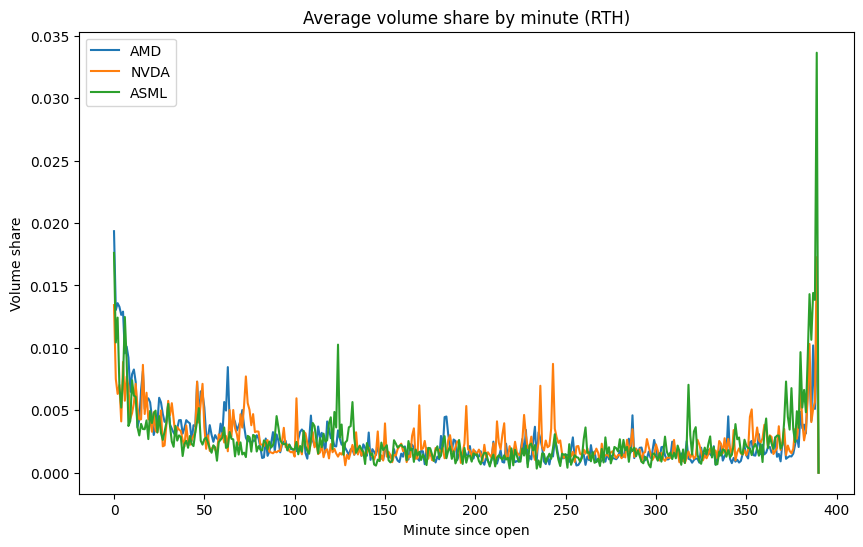

In [ ]:
from __future__ import annotations
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime as dt
from pathlib import Path
import itertools

ROOT = Path('/workspaces/Stock-Market-Prediction/Microstructure')  
FILES = {
    'AMD':  ROOT / 'BATS_AMD, 1S_1ae42.csv',
    'NVDA': ROOT / 'BATS_NVDA, 1S_5f53d.csv',
    'ASML': ROOT / 'BATS_ASML, 1S_e4832.csv',
}
PCT_ADV = 0.05  # order size (5 % ADV)

# Grid search params
GRID = {
    'lookback': [30, 60, 120],   # seconds for momentum window
    'up':       [1.5, 2.0, 3.0], # tilt when flow is favourable
    'down':     [0.25, 0.4, 0.5, 0.75, 1.0],  # tilt when adverse
}
FAST = False

if FAST:
    GRID = {
        'lookback': [60], 'up': [2.0], 'down': [0.25, 0.5, 0.75]
    }


def load_symbol(path: Path) -> pd.DataFrame:
    """Load a second‑level CSV, convert to US/Eastern tz, keep RTH."""
    df = pd.read_csv(path)
    df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
    ts_col = 'time' if 'time' in df.columns else 'timestamp'
    df['timestamp'] = (pd.to_datetime(df[ts_col], utc=True)
                         .dt.tz_convert('America/New_York'))
    mask_rth = ((df['timestamp'].dt.time >= dt.time(9, 30)) &
                (df['timestamp'].dt.time <= dt.time(16, 0)))
    df = df.loc[mask_rth].copy().set_index('timestamp')
    df['price'] = df['close']
    df['ret'] = df['price'].pct_change().fillna(0)
    if {'high', 'low'} <= set(df.columns):
        df['spread_proxy'] = (df['high'] - df['low']) / df['price']
    else:
        df['spread_proxy'] = np.nan
    return df


def expected_volume_curve(df: pd.DataFrame, freq: str = '1min') -> pd.Series:
    vol = df['volume'].groupby(pd.Grouper(freq=freq)).sum().between_time('09:30', '16:00')
    share = vol.groupby(vol.index.date).transform(lambda x: x / x.sum())
    return share.groupby(share.index.time).mean()


#  Dynamic‑POV sim


def simulate_day(day: pd.DataFrame, *, hist_curve: pd.Series, qty: float,
                 lookback: int, up: float, down: float, side: str = 'buy') -> float:
    sgn = 1 if side == 'buy' else -1
    day_vol = day['volume'].sum()
    bench_vwap = (day['price'] * day['volume']).sum() / day_vol

    # Expected vs realised share
    hist_share = pd.Series(hist_curve.reindex(day.index.time).values,
                           index=day.index).replace(0, 1e-9)
    pov = (day['volume'] / day_vol) / hist_share
    pov /= pov.median()

    # Momentum tilt
    ret = day['price'].pct_change(lookback).fillna(0)
    tilt = np.where(sgn * ret < 0, up, down)

    weights = day['volume'] * pov * tilt
    alloc = qty * weights / weights.sum()
    fill_cost = (alloc * day['price']).sum()
    return sgn * (fill_cost / qty - bench_vwap) / bench_vwap * 1e4  # bp


def run_strategy(df: pd.DataFrame, curve: pd.Series, *, pct_adv: float,
                 lookback: int, up: float, down: float) -> float:
    slips = []
    for _, day in df.groupby(df.index.date):
        day_vol = day['volume'].sum()
        if day_vol == 0:
            continue
        qty = pct_adv * day_vol
        slips.append(simulate_day(day, hist_curve=curve, qty=qty,
                                  lookback=lookback, up=up, down=down))
    return float(np.mean(slips)) if slips else np.nan

print('Loading CSVs…')
DATA = {sym: load_symbol(p) for sym, p in FILES.items()}
CURVES = {sym: expected_volume_curve(df) for sym, df in DATA.items()}
print('Done.')

# Grid Search
records = []
for look, up, down in itertools.product(GRID['lookback'], GRID['up'], GRID['down']):
    perf = {sym: run_strategy(df, CURVES[sym], pct_adv=PCT_ADV,
                              lookback=look, up=up, down=down)
            for sym, df in DATA.items()}
    records.append({
        'lookback': look, 'up': up, 'down': down,
        **perf,
        'agg': np.nanmean(list(perf.values())),
    })

results = pd.DataFrame(records).sort_values('agg')

print('Top 10 parameter combos (bp vs VWAP, lower better):')
display(results.head(10))

best = results.iloc[0]
print('\nBest overall parameters:')
print(best[['lookback', 'up', 'down', 'agg']])
print('\nPer‑symbol slips (bp):')
for sym in DATA:
    print(f"{sym}: {best[sym]:+0.2f}")

plt.figure(figsize=(10, 6))
for sym, vc in CURVES.items():
    plt.plot(range(len(vc)), vc.values, label=sym)
plt.title('Average volume share by minute (RTH)')
plt.xlabel('Minute since open')
plt.ylabel('Volume share')
plt.legend()
plt.show()


### Grid Search Results

| **lookback** | How many seconds of recent price moves to look at to decide if the market is going our way or against us. | **120 s** (i.e. a 2-minute window) |
| **up** | How much faster to trade when the price is drifting **in favour** (price falling while we’re buying, or rising while we’re selling). | **3× faster** |
| **down** | How much we slow down when the price is drifting **against us**. | **1/4x speed** (only 25 % of normal) |

---

#### Translation into Performance

| Stock | Plain VWAP (baseline) | “Dynamic” schedule | Improvement |
| AMD   | 0 bp | **-52 bp** | Very patchy liquidty so picking the right moments saves a lot. 
| NVDA  | 0 bp | **-6 bp**  | Liquidity is deep obviously but timing still helps 
| ASML  | 0 bp | **-0.6 bp**| thin name savings aren't huge. |
| **Average** | 0 bp | **-19.7 bp** | About 20 bp better than simply following VWAP. |

### Rationalisation

* **120-second window**  
  A two-minute view smooths out random noise but still reacts quickly to real moves.

* **Speeding up 3x on good moves**  
  If price is falling while we need to buy, we grab liquidity aggressively – cheaper shares, less risk of a bounce.

* **Slowing to 0.25x on bad moves**  
  When price is ticking up, we back off and wait. This avoids paying to chase the market.

The strategy is more aggressive when the market is helping us and backs off when it isn’t – this saves roughly 20 bps over past 30 days compared to the vwap schedule, however one must note that given I have performed a grid search on past data this could be heavily biased by recency. More robust statistical testing is needed to determine the out of sample performance of this execution strat. 